In [ ]:
stats.jarque_bera(arr_1) # 검정통계량, p-value
## SignificanceResult(statistic=0.9766068804921089, pvalue=0.6136666336336749)

stats.jarque_bera(arr_2) # 검정통계량, p-value
## SignificanceResult(statistic=0.3851809149153991, pvalue=0.8248197037354764)

stats.jarque_bera(arr_3) # 검정통계량, p-value
## SignificanceResult(statistic=3.2771308782900626, pvalue=0.19425851816374295)

SignificanceResult(statistic=np.float64(3.2771308782900626), pvalue=np.float64(0.19425851816374295))

### 와인 품질 예측하기

In [ ]:
import pandas as pd

red_df = pd.read_csv('datasets/winequality-red.csv', sep = ';', header = 0, engine = 'python')

white_df = pd.read_csv('datasets/winequality-white.csv', sep = ';', header = 0, engine= 'python')

print(red_df.head())
print("=" * 80)
print(white_df.head())

red_df.to_csv('datasets/winequality-red2.csv', index = False)

white_df.to_csv('datasets/winequality-white2.csv', index = False)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
red_df.insert(0, column = 'type', value = 'red')
print(red_df.head())
print(red_df.shape)
print("=" * 80)
white_df.insert(0, column = 'type', value = 'white')
print(white_df.head())
print(white_df.shape)
print("=" * 80)
wine = pd.concat([red_df, white_df])
print(wine.head())
print(wine.shape)
wine.to_csv('datasets/wine.csv', index = False)

  type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.head())
print("=" * 80)
print(wine.describe())

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [ ]:
print(sorted(wine.quality.unique()))
print("=" * 80)
print(wine.quality.value_counts())

[np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [ ]:
print(wine.groupby('type')['quality'].describe())
print("=" * 80)
print(wine.groupby('type')['quality'].mean())
print("=" * 80)
print(wine.groupby('type')['quality'].std())
print("=" * 80)
print(wine.groupby('type')['quality'].agg(['mean', 'std']))

        count      mean       std  min  25%  50%  75%  max
type                                                      
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0
type
red      5.636023
white    5.877909
Name: quality, dtype: float64
type
red      0.807569
white    0.885639
Name: quality, dtype: float64
           mean       std
type                     
red    5.636023  0.807569
white  5.877909  0.885639


In [ ]:
from scipy import stats
from statsmodels.formula.api import ols, glm

red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

regression_result = ols(Rformula, data = wine).fit()

regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        13:26:14   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sample1 = wine[wine.columns.difference(['quality', 'type'])]
sample1 = sample1[0:5][:]

sample1_predict = regression_result.predict(sample1)

print(sample1_predict)
print("=" * 80)
print(wine[0:5]['quality'])

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [ ]:
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],"citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8], "chlorides":[0.055,0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,99], "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],"alcohol":[9.0, 0.88]}

sample2 = pd.DataFrame(data, columns= sample1.columns)
print(sample2 )
print("=" * 80)
sample2_predict = regression_result.predict(sample2)
print(sample2_predict)


   alcohol  chlorides  citric_acid  density  fixed_acidity  \
0     9.00      0.055          0.3    0.996            8.5   
1     0.88      0.040          0.4    0.910            8.1   

   free_sulfur_dioxide    pH  residual_sugar  sulphates  total_sulfur_dioxide  \
0                 30.0  3.25             6.1       0.40                  98.0   
1                 31.0  3.01             5.8       0.35                  99.0   

   volatile_acidity  
0               0.8  
1               0.5  
0    4.809094
1    7.582129
dtype: float64


C:\Users\k8s\AppData\Local\Temp\ipykernel_9352\3172670479.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_quality, kde = True, color = "red", label = 'red wine')
C:\Users\k8s\AppData\Local\Temp\ipykernel_9352\3172670479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_

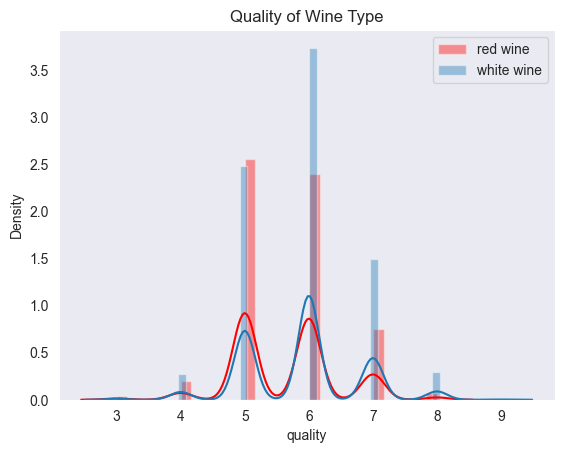

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
sns.distplot(red_wine_quality, kde = True, color = "red", label = 'red wine')
sns.distplot(white_wine_quality, kde = True, label = 'white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

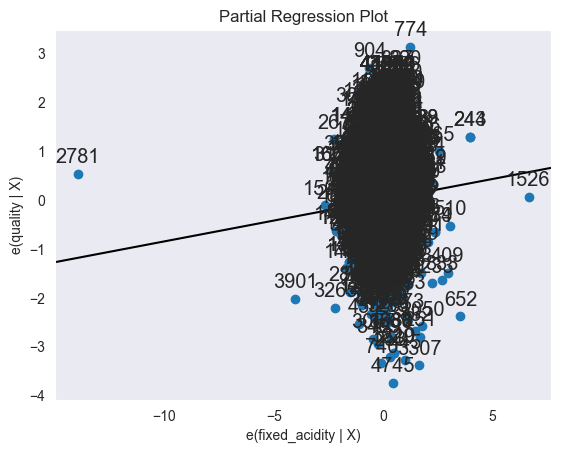

In [ ]:
import statsmodels.api as sm

others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)
plt.show()

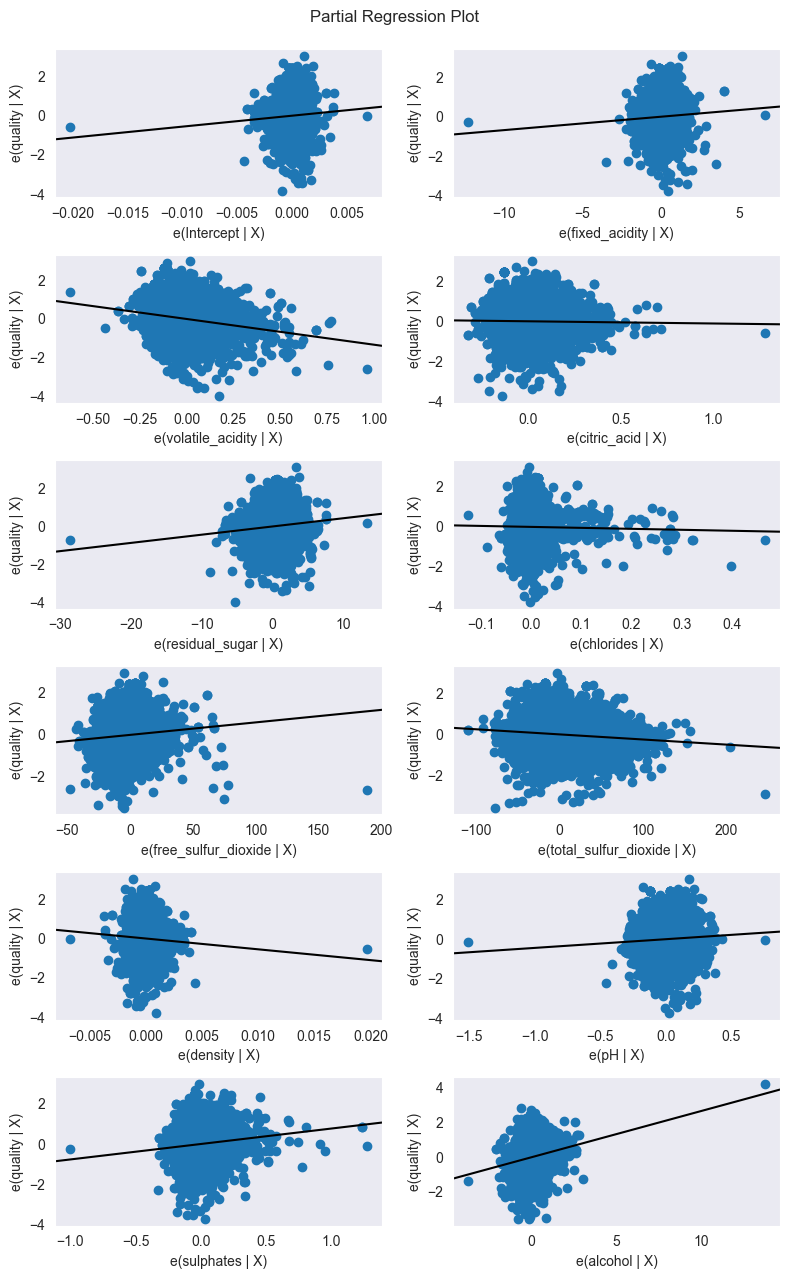

In [ ]:
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()